# Data Exploration

In this notebook describe your data exploration steps.

## Install dependencies

In [2]:
%pip install pandas
%pip install 'SQLAlchemy==1.4.46'

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Load data

In [3]:
import pandas as pd
import re

hotspots_in_koeln_df = pd.read_sql_table('hotspots_in_koeln', 'sqlite:///data/project.sqlite')
road_sections_df = pd.read_sql_table('road_sections', 'sqlite:///data/project.sqlite')

### Look at the first rows

In [3]:
hotspots_in_koeln_df.head(10)

,OBJECTID,Stadtbezirk,AP Name,Straßenname,Haus Nr,Auftragsstatus Gesamt,Geometry_x,Geometry_y
0,1,Innenstadt,AP-Aachener-Str-01,Aachener Straße,12,In Betrieb,6.937254,50.936539
1,2,Innenstadt,AP-Aachener-Str-02,Aachener Straße,38,In Betrieb,6.935648,50.936562
2,3,Innenstadt,AP-Aachener-Str-03,Aachener Straße,60-62,In Betrieb,6.933976,50.936620
3,4,Innenstadt,AP-Aachener-Str-04,Aachener Straße,76,In Betrieb,6.932288,50.936639
4,5,Innenstadt,AP-Aachener-Str-05,Aachener Straße,88,In Betrieb,6.930443,50.936672
5,6,Innenstadt,AP-Aachener-Str-06,Aachener Straße,112,In Betrieb,6.928908,50.936755
6,7,Innenstadt,AP-Aachener-Str-07,Aachener Straße,114,In Betrieb,6.927337,50.936773
7,8,Innenstadt,AP-Aachener-Str-08,Aachener Straße,130,In Betrieb,6.925944,50.936801
8,9,Lindenthal,AP-Aachener-Str-09,Innere Kanalstraße,7,In Betrieb,6.924270,50.936940
9,10,Lindenthal,AP-Aachener-Str-10,Aachener Str.,209,Im Bau,6.923021,50.936838


In [4]:
road_sections_df.head(100)

,OBJECTID,Nummer,Straße,Hausnummer von links,Hausnummer bis links,Hausnummer von rechts,Hausnummer bis rechts,Länge (m),GLOBALID,st_length(shape),Geometry_paths
0,8289,02274010,Mühlenbach,0007,0059,0002,0042,246.0,{3EB047DF-4233-4744-85CF-4B41E4658011},246.129123,"[[6.956258032574851, 50.93279687112151], [6.95..."
1,17,01475010,Hohenzollernbrücke,0000,0000,0000,0000,793.0,{5B623377-8801-4F4A-8091-EFF3FE545F88},793.167401,"[[6.962856466278041, 50.94145686459681], [6.96..."
2,19,03206010,Fritz-Encke-Volkspark,0000,0000,0000,0000,16.0,{5BD40C55-E37E-4226-BCD4-7BA6C6B49797},16.573388,"[[6.954365942979147, 50.89441413720378], [6.95..."
3,21,03524010,Marienberger Hof,0000,0000,0000,0000,18.0,{3F6C7D98-1CCE-4E94-BD2B-6F587C7D910F},18.057309,"[[6.889100945432353, 51.00253044792337], [6.88..."
4,25,03758010,Trude-Herr-Park,0000,0000,0000,0000,23.0,{EBDA9939-444C-4C1A-9A4E-7898960C999B},23.421432,"[[6.963864600538986, 50.924904035191844], [6.9..."
...,...,...,...,...,...,...,...,...,...,...,...
95,185,05108060,Ludwig-Jahn-Str. Lin,0019,0023,0072,0078,130.0,{E62F4B16-F8CA-48D5-A2EB-9BAEDCFCA3EB},130.218778,"[[6.844717956471703, 50.94198985183254], [6.84..."
96,187,04202060,An der Ronne,0000,0000,0000,0000,17.0,{BE330BF0-4D8A-4E40-B49A-9FFE43FCE58F},17.863622,"[[6.823964189764691, 50.949865092908055], [6.8..."
97,188,05043040,Lahnstr. Lin,0025,0047,0026,0032,96.0,{4F410381-1180-4F8D-A5DD-766920FBB0E9},96.527220,"[[6.820150525733304, 50.94524981904233], [6.81..."
98,190,05133010,Malteserstr. Lin,0001,0009,0002,0012,121.0,{95596FE3-73A2-49D3-8975-89CA10F08C46},121.922365,"[[6.827998023678947, 50.951443916872485], [6.8..."


### Data exploration
Print some basic information about the data. Your data exploration would continue here.

In [6]:
hotspots_in_koeln_df.info()

hotspots_in_koeln_df['Straßenname'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OBJECTID               200 non-null    int64  
 1   Stadtbezirk            200 non-null    object 
 2   AP Name                200 non-null    object 
 3   Straßenname            200 non-null    object 
 4   Haus Nr                195 non-null    object 
 5   Auftragsstatus Gesamt  200 non-null    object 
 6   Geometry_x             200 non-null    float64
 7   Geometry_y             200 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 12.6+ KB


array(['Aachener Straße', 'Innere Kanalstraße', 'Aachener Str.',
       'An der Sparkasse', 'Alter Stammheimer Weg', 'Am Vorgebirgstor',
       'Bremsstraße', 'Bahnhofstraße', 'Bartholomäus-Schink-Straße',
       'Bergisch Gladbacher Straße', 'Berliner Straße', 'Berrischstraße',
       'Ringstrasse', 'Bahnstrasse', 'Bonner Straße', 'Breite Straße',
       'Bruchstraße', 'Peter-Stühlen-Straße ', 'Causemannstraße',
       'Chlodwigplatz', 'Dellbrücker Hauptstraße', 'Deutz-Kalker-Straße',
       'Deutz-Mühlheimer Straße', 'Dürener Straße', 'Ehrenfeldgürtel',
       'Emdener Straße', 'Ernst-Mühlendyck-Straße', 'Frankfurter Straße',
       'Riehler Str Auff Innere Kanal Str', 'Geiersbergstraße',
       'Göthestraße', 'Hauptstraße', 'Josefstraße', 'Kaiserstraße',
       'Kalker Hauptstraße', 'Kyffhäuserstraße', 'Liverpooler Platz',
       'Luxemburger Straße', 'Marienplatz', 'Maternusstraße',
       'Maybachstraße', 'Erftstraße', 'Montanusstraße', 'Neusser Straße',
       'Ostheimer Straße '

In [7]:
road_sections_df.info()

road_sections_df['Straße'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OBJECTID               10000 non-null  int64  
 1   Nummer                 10000 non-null  object 
 2   Straße                 10000 non-null  object 
 3   Hausnummer von links   9981 non-null   object 
 4   Hausnummer bis links   9981 non-null   object 
 5   Hausnummer von rechts  9983 non-null   object 
 6   Hausnummer bis rechts  9983 non-null   object 
 7   Länge (m)              9968 non-null   float64
 8   GLOBALID               10000 non-null  object 
 9   st_length(shape)       10000 non-null  float64
 10  Geometry_paths         10000 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.5+ KB


array(['Mühlenbach', 'Hohenzollernbrücke', 'Fritz-Encke-Volkspark', ...,
       'Am Alten Brauhaus', 'Auf der Burg', 'Mathias-Faßbender-Str.'],
      dtype=object)

# Hotspots dataset

How many hotspots in each street ?

In [8]:
# Making standard street names to match with the street names from the roads table
hotspots_in_koeln_df['Straße_name'] = hotspots_in_koeln_df['Straßenname'].map(lambda x: re.split('[s|S]tr[ |a|"."]', x)[0])

<AxesSubplot: >

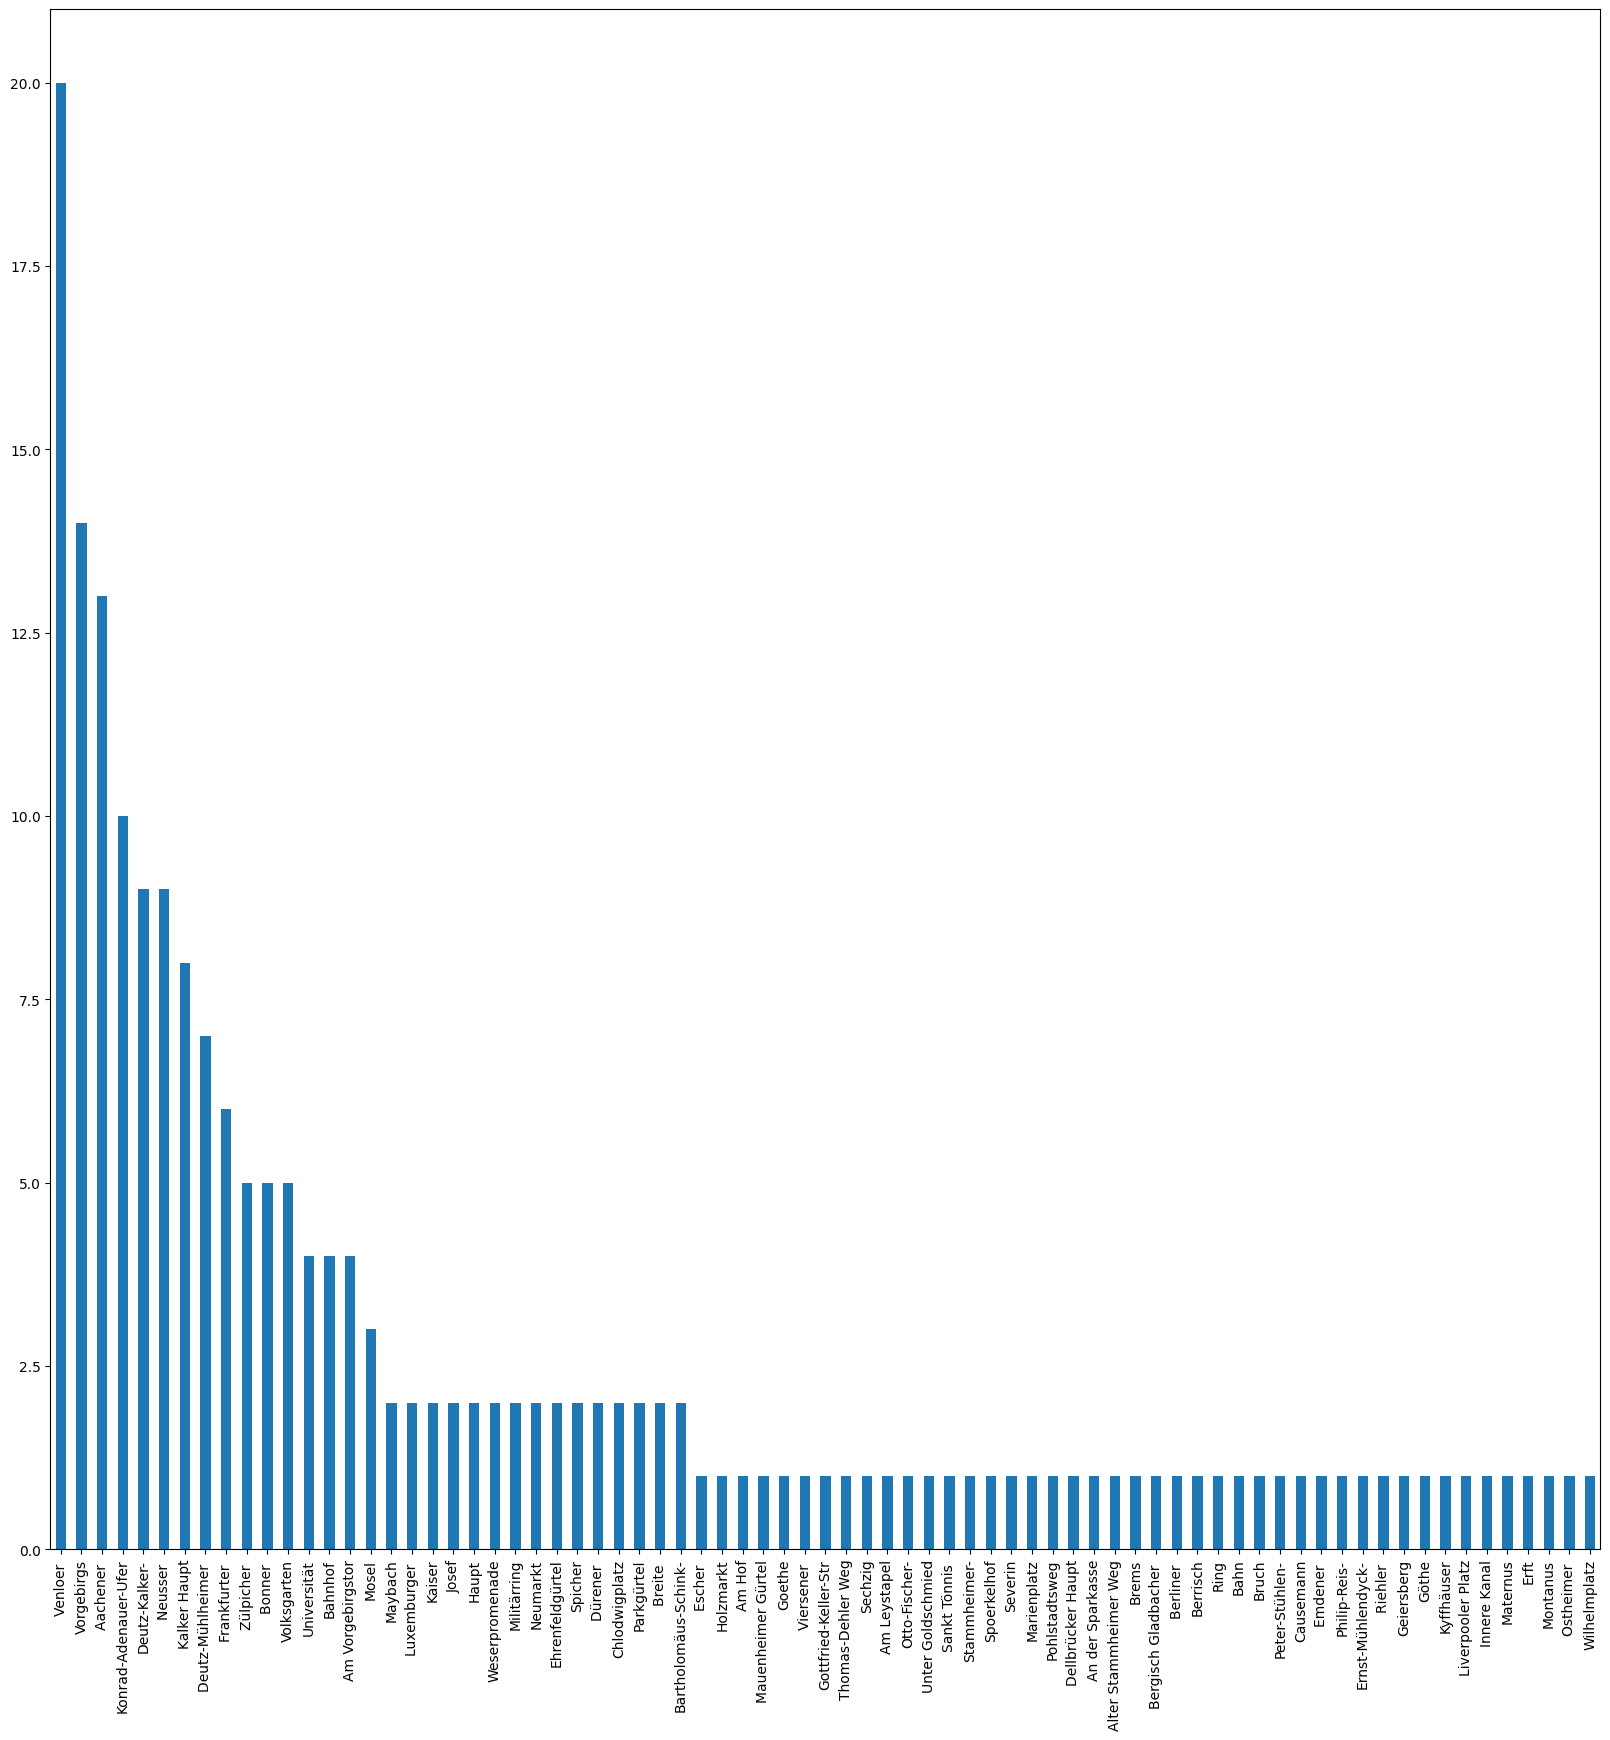

In [9]:
hotspots_in_koeln_df['Straße_name'].value_counts().plot(kind='bar' , figsize=(20,20))

# Road sections

How many intersections in the streets that have hotspots?

In [61]:
# Making standard street names to match with the street names from the hotspot table
road_sections_df['Straße_name'] = road_sections_df['Straße'].map(lambda x: re.split('[s|S]tr[ |a|"."]', x)[0])

<AxesSubplot: >

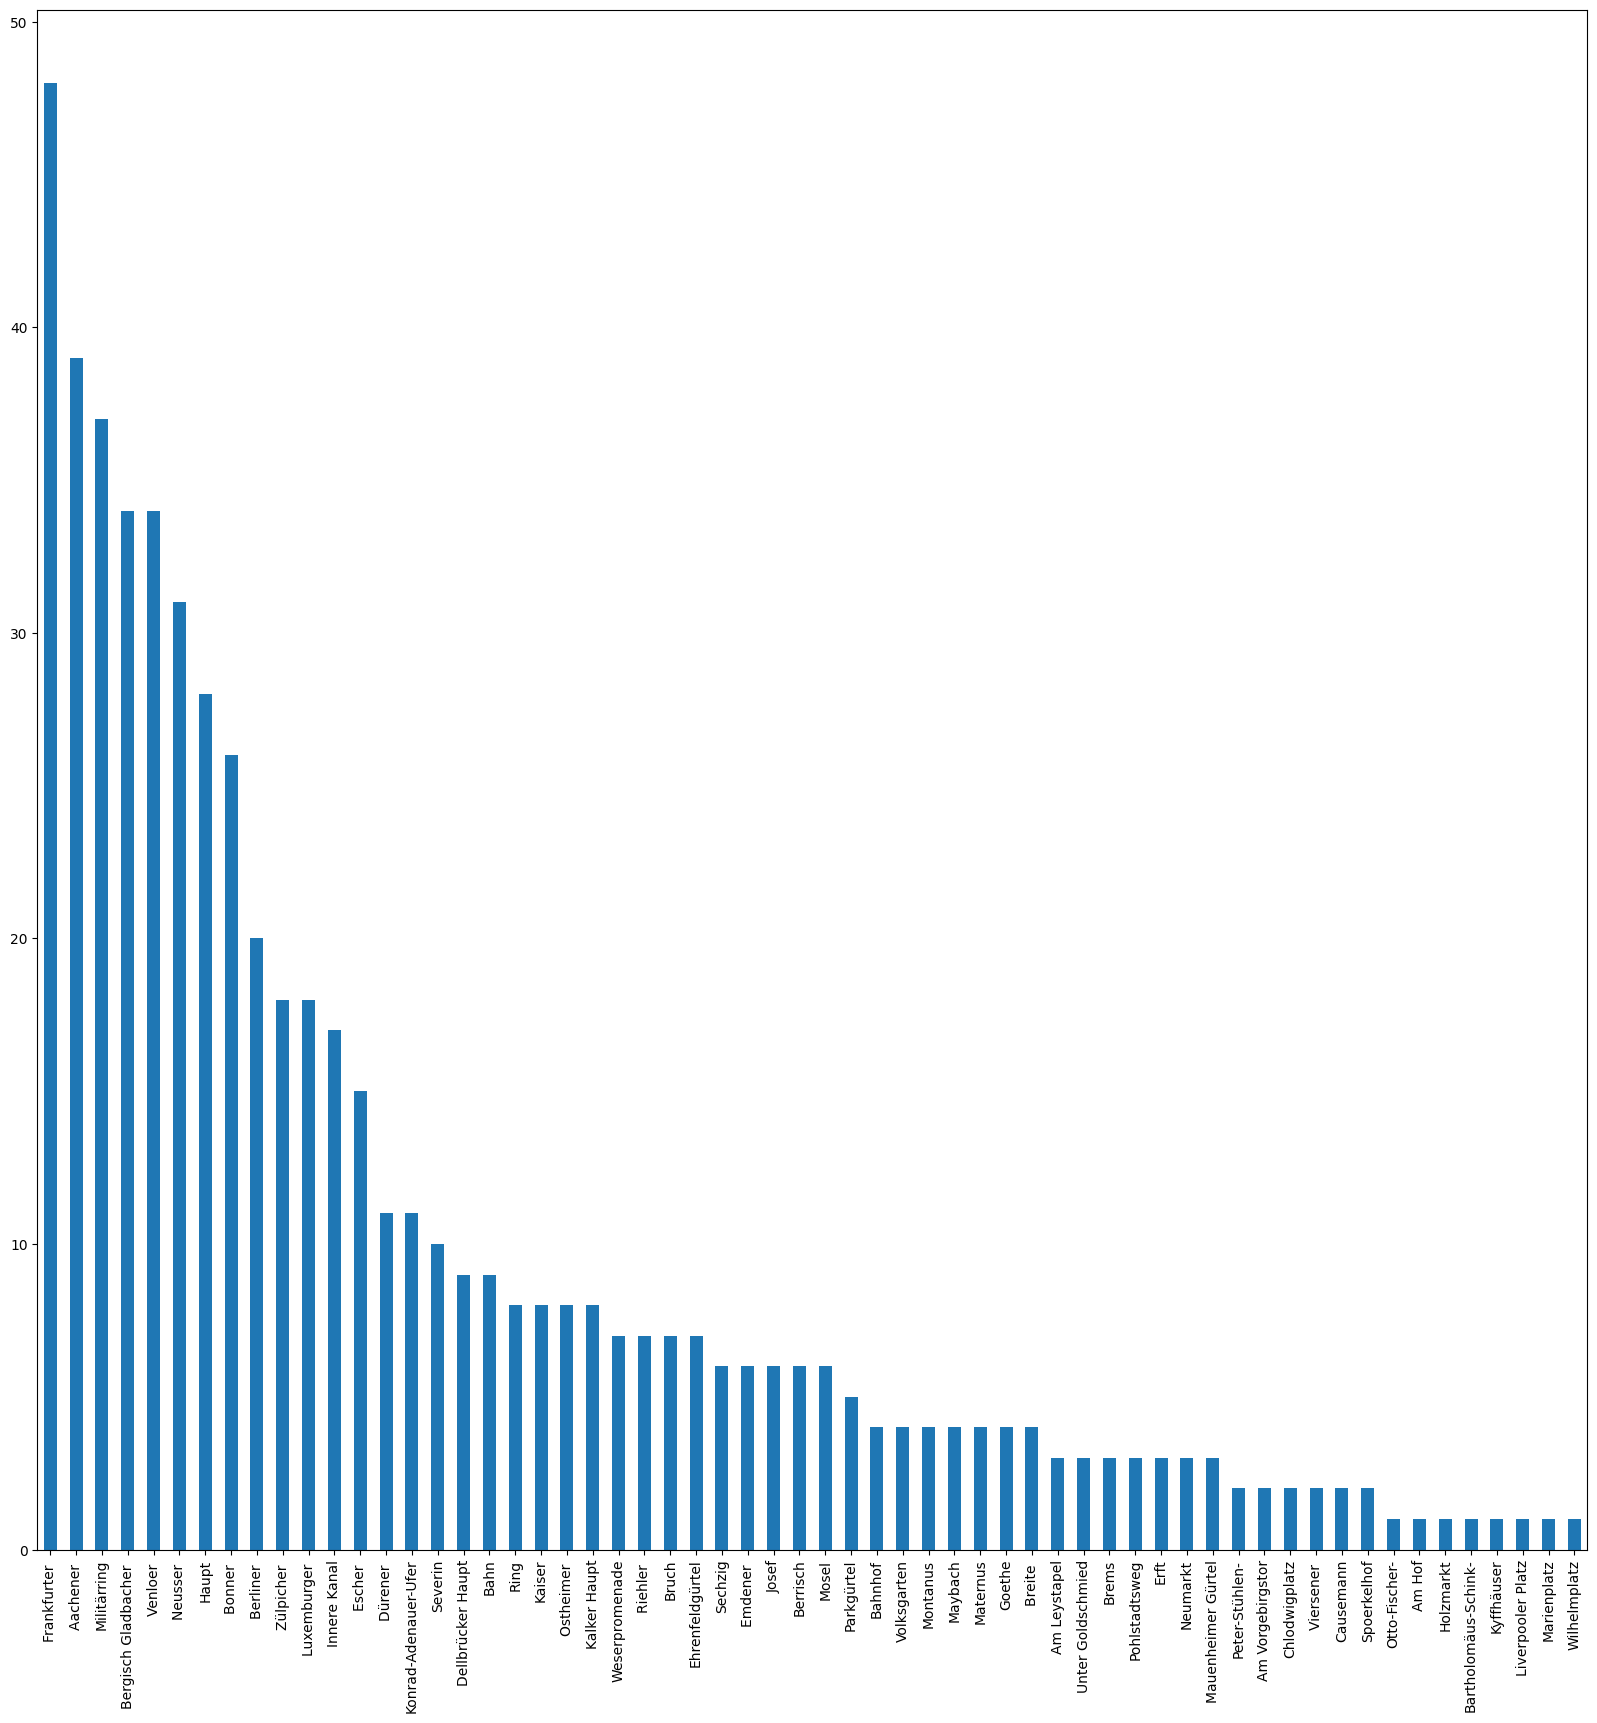

In [78]:
road_sections_df[road_sections_df['Straße_name'].isin(list(hotspots_in_koeln_df['Straße_name'].unique()))]['Straße_name'].value_counts().plot(kind='bar' , figsize=(20,20))

Filter the sections that has hotspots directly

In [116]:
all_in_one = hotspots_in_koeln_df.merge(road_sections_df , on='Straße_name')
all_in_one['houses in the intersection'] = all_in_one[['Hausnummer von links' , 'Hausnummer bis links' ,'Hausnummer von rechts'	, 'Hausnummer bis rechts' ]].values.tolist()
all_in_one

,OBJECTID_x,Stadtbezirk,AP Name,Straßenname,Haus Nr,Auftragsstatus Gesamt,Geometry_x,Geometry_y,Straße_name,OBJECTID_y,...,Straße,Hausnummer von links,Hausnummer bis links,Hausnummer von rechts,Hausnummer bis rechts,Länge (m),GLOBALID,st_length(shape),Geometry_paths,houses in the intersection
0,1,Innenstadt,AP-Aachener-Str-01,Aachener Straße,12,In Betrieb,6.937254,50.936539,Aachener,10683,...,Aachener Str.,0001,0029,0012,0052,212.0,{F108F1A7-0E2A-4253-BBE3-B0ACA2FE7520},212.390441,"[[6.937603996954711, 50.93647628102094], [6.93...","[0001, 0029, 0012, 0052]"
1,1,Innenstadt,AP-Aachener-Str-01,Aachener Straße,12,In Betrieb,6.937254,50.936539,Aachener,10636,...,Aachener Str.,1143,1185a,1128,1158,245.0,{42F05040-6AFC-4379-AD17-1A3AB7936C88},245.264285,"[[6.8444056799968696, 50.93815271086938], [6.8...","[1143, 1185a, 1128, 1158]"
2,1,Innenstadt,AP-Aachener-Str-01,Aachener Straße,12,In Betrieb,6.937254,50.936539,Aachener,10655,...,Aachener Str.,1025,1033,1032,1036,82.0,{EFEA595D-4BC6-40AC-B081-130CCF1C695F},82.466877,"[[6.85958370142103, 50.937865343823844], [6.85...","[1025, 1033, 1032, 1036]"
3,1,Innenstadt,AP-Aachener-Str-01,Aachener Straße,12,In Betrieb,6.937254,50.936539,Aachener,10658,...,Aachener Str.,1001,1001,0000,0000,58.0,{9D6E2268-CA1E-47DE-9C2B-9814D8C629FB},58.918683,"[[6.866404295698484, 50.93778514779289], [6.86...","[1001, 1001, 0000, 0000]"
4,1,Innenstadt,AP-Aachener-Str-01,Aachener Straße,12,In Betrieb,6.937254,50.936539,Aachener,10633,...,Aachener Str.,1187,1215,1158a,1196,281.0,{4468B9CE-6EAF-478E-AD5B-AD93DEC9552E},281.095924,"[[6.8409170782352655, 50.93820765766995], [6.8...","[1187, 1215, 1158a, 1196]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2694,196,Chorweiler,AP-Weserpromenade-02,Weserpromenade,14,In Betrieb,6.893046,51.028042,Weserpromenade,11519,...,Weserpromenade,0000,0000,0000,0000,124.0,{97F2533F-D302-44F1-9DEE-442D55C53CF1},124.486562,"[[6.893965286307892, 51.02703326901007], [6.89...","[0000, 0000, 0000, 0000]"
2695,196,Chorweiler,AP-Weserpromenade-02,Weserpromenade,14,In Betrieb,6.893046,51.028042,Weserpromenade,11532,...,Weserpromenade,0000,0000,0000,0000,36.0,{331C8374-C5D4-40B0-9946-3D2F50842755},36.465738,"[[6.894245912359472, 51.0267573112417], [6.893...","[0000, 0000, 0000, 0000]"
2696,196,Chorweiler,AP-Weserpromenade-02,Weserpromenade,14,In Betrieb,6.893046,51.028042,Weserpromenade,11523,...,Weserpromenade,0035,0039,0000,0000,48.0,{5BD6F49E-C869-46AF-9532-37FAC1C42D50},48.776349,"[[6.891138510130897, 51.02949147109185], [6.89...","[0035, 0039, 0000, 0000]"
2697,196,Chorweiler,AP-Weserpromenade-02,Weserpromenade,14,In Betrieb,6.893046,51.028042,Weserpromenade,11522,...,Weserpromenade,0000,0000,0000,0000,68.0,{6AD3726A-602A-4EF4-B2F7-8121EB8843B0},68.882667,"[[6.890789839719613, 51.029870866333255], [6.8...","[0000, 0000, 0000, 0000]"


In [129]:
interesections_with_hotspots = []
for i , row in all_in_one.iterrows():
    try :
        if row['Haus Nr'].zfill(4) in row['houses in the intersection']:
            interesections_with_hotspots.append(row)
    except:
        pass

In [131]:
interesections_with_hotspots_df = pd.DataFrame(interesections_with_hotspots)

In [132]:
interesections_with_hotspots_df

,OBJECTID_x,Stadtbezirk,AP Name,Straßenname,Haus Nr,Auftragsstatus Gesamt,Geometry_x,Geometry_y,Straße_name,OBJECTID_y,...,Straße,Hausnummer von links,Hausnummer bis links,Hausnummer von rechts,Hausnummer bis rechts,Länge (m),GLOBALID,st_length(shape),Geometry_paths,houses in the intersection
0,1,Innenstadt,AP-Aachener-Str-01,Aachener Straße,12,In Betrieb,6.937254,50.936539,Aachener,10683,...,Aachener Str.,0001,0029,0012,0052,212.0,{F108F1A7-0E2A-4253-BBE3-B0ACA2FE7520},212.390441,"[[6.937603996954711, 50.93647628102094], [6.93...","[0001, 0029, 0012, 0052]"
154,4,Innenstadt,AP-Aachener-Str-04,Aachener Straße,76,In Betrieb,6.932288,50.936639,Aachener,10685,...,Aachener Str.,0061,0071,0076,0088,166.0,{80DC3293-60EC-4042-8F27-F9B972DD6350},166.792035,"[[6.9326193452203055, 50.93655658690578], [6.9...","[0061, 0071, 0076, 0088]"
193,5,Innenstadt,AP-Aachener-Str-05,Aachener Straße,88,In Betrieb,6.930443,50.936672,Aachener,10685,...,Aachener Str.,0061,0071,0076,0088,166.0,{80DC3293-60EC-4042-8F27-F9B972DD6350},166.792035,"[[6.9326193452203055, 50.93655658690578], [6.9...","[0061, 0071, 0076, 0088]"
264,7,Innenstadt,AP-Aachener-Str-07,Aachener Straße,114,In Betrieb,6.927337,50.936773,Aachener,10687,...,Aachener Str.,0000,0000,0090,0114,144.0,{9608C42E-CF16-437E-8772-0031C3844336},144.710280,"[[6.93025226042718, 50.93663148411269], [6.929...","[0000, 0000, 0090, 0114]"
304,8,Innenstadt,AP-Aachener-Str-08,Aachener Straße,130,In Betrieb,6.925944,50.936801,Aachener,10688,...,Aachener Str.,0000,0000,0130,0130,247.0,{F25C77E7-1636-49F2-A3AE-CDC0A96500AC},247.574047,"[[6.928201567648358, 50.9366206656237], [6.924...","[0000, 0000, 0130, 0130]"
341,10,Lindenthal,AP-Aachener-Str-10,Aachener Str.,209,Im Bau,6.923021,50.936838,Aachener,10694,...,Aachener Str.,0197,0209,0188,0188,91.0,{EB94B88C-74AB-4EEB-B75C-6108A855BEFE},91.450607,"[[6.923241073979789, 50.93666523046974], [6.92...","[0197, 0209, 0188, 0188]"
511,9,Lindenthal,AP-Aachener-Str-09,Innere Kanalstraße,7,In Betrieb,6.924270,50.936940,Innere Kanal,12782,...,Innere Kanalstr.,0007,0007,0000,0000,119.0,{6E261FC4-C480-4383-9100-3A54B05485CB},119.524066,"[[6.92467934637262, 50.936649078170326], [6.92...","[0007, 0007, 0000, 0000]"
541,22,Porz,AP-Bahnhofstr-02,Bahnhofstraße,26,In Betrieb,7.057439,50.883704,Bahnhof,4107,...,Bahnhofstr. Por,0017,0027,0026,0042,101.0,{FC0AD33B-CA9A-4D7E-A781-CDA1E18942F1},101.036960,"[[7.057468221896479, 50.88374974014528], [7.05...","[0017, 0027, 0026, 0042]"
547,24,Porz,AP-Bahnhofstr-04,Bahnhofstraße,80,In Betrieb,7.061665,50.882880,Bahnhof,4120,...,Bahnhofstr. Por,0000,0000,0080,0094,76.0,{4463CE3A-4DFF-4DB6-87BC-48D6126AB2DE},76.994056,"[[7.061299492318484, 50.88295407479231], [7.06...","[0000, 0000, 0080, 0094]"
551,25,Ehrenfeld,AP-Bartholomaeus-Schink-01,Bartholomäus-Schink-Straße,2,In Betrieb,6.917911,50.952006,Bartholomäus-Schink-,4099,...,Bartholomäus-Schink-Str.,0065,0067,0002,0006a,232.0,{D21EA026-F017-4A3A-AB05-D234B6CFC702},232.834598,"[[6.918682364517955, 50.95208763578242], [6.91...","[0065, 0067, 0002, 0006a]"
